In [1]:
import sys
sys.path.append("/Users/guillaumelaunay/work/DVL/python3/pyproteinsExt/src")
cDir="/Users/guillaumelaunay/work/communications/lectures/UCBL/M2_bioinfo/VDB/Python_D3_project"
sys.path.append(cDir + '/lib')

In [2]:
import pandas, uniprot, go
%load_ext autoreload
%autoreload 2

## Datasets
* Two conditions XLS
* Tiny XLS
* Go ontology as [owl](http://www.obofoundry.org/ontology/go.html)

## Steps
1. Lire et traiter des données d'entrée avec [PANDAS](https://pandas.pydata.org/)

2. Représenter la distribution empirique des "fold-change" (**FC**)

3. Evaluer un seuil de **FDR** 5%, with normal approximation
    * Proposer une function qui à un seuil de faux-positif retourne une valeur de **FDC**
    * Proposer une fonction qui appelle la précedente et retourne, en plus, une représentation graphique

4. Volcano plot
    * Scatter-Plot **FC** vs **LOG10 Adj.P-val**
    * Colorer les protéines très/peu abondantes
    * ipyWidget slider FDR permettant de changer les seuils "d'abondance"

5. Analyse de l'enrichissement en pathway Gene Ontology
    * Arbre des termes d'ontologie.
        * Visualisation de l'arbre complet
    * Modélisation hypergéometrique des fréquence attendues des termes GO
        * Les protéines très abondantes présentent-elles des termes GO en quantité remarquable ?
        * Les protéines peu abondantes présentent-elles des termes GO en quantité remarquable ?
    * Vislusation de l'arbre avec style des noeuds rendant compte des protéines qu'ils annotent
    
6. Volcano Plot présentant les pathways
    * ipyWidget Slider
    * Coloration des points pour les protéines annotées par ce pathway 

## Conclusion
* Compare wt/mutant conditions


## Ressources
https://www.bioconductor.org/help/course-materials/2015/SeattleApr2015/E_GeneSetEnrichment.html



## Plan Experimental

Organisme modèle

Questions posées

Protocole biologique

PRotocler de Mesue

Nature des données à analyser

# Parsing et Prétraitement des données

Le terme *SA*, désigne le ratio de (**S**ur) **A**bondance pour une protéines entre deux experiences.
Les valeurs de **SA** sont stockées dans la colonne ```Log2 Corrected Abundance Ratio```. Un "ratio" négatif indique qu'une protéine est moins présente dans l'experience considéré par rapport à une experience de référence.


#### Visualisation des valeurs experimentales
Charger ```TCL_wt1.txt``` dans une [dataframe pandas](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html).
    * Retirer les lignes présentant des [abbérations numériques](https://cmdlinetips.com/2018/02/how-to-subset-pandas-dataframe-based-on-values-of-a-column/)
<!--* Compute Foldxx-->

Représenter la distribution des **SA** de l'experience.
    * [matplotlib histogramme](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.hist.html)
    * implémenter ce graphique dans une fonction 
```python 
    def empirical(SA_list)
```


#### Distribution théorique attendue
Entre deux experiences, les quantités d'une protéine non affectée par le changement de conditions devraient-elles être strictement identiques ?

Proposer une distribution théorique des **SA** des protéines **non affectées** par le changement de conditions.
 * Calculer les paramètres de cette distribution à partir de l'échantillon
 * Représenter ces paramètres par des lignes verticales sur l'histogramme précedent

Implémenter une fonction qui prend un échantillon et **dessine** la distribution théorique et empirique. Elle utilisera la fonction ```empirical()```

```python 
    def empiricalAndTheoric(SA_list)
```


#### Seuil de significativité
Comment déterminer un seuil de *SA* au delà duquel seulement 5% des protéines non affectées seraient selectionnées ?

Pour une Méthode de reconnaissance des protéines sur exprimées que siginifie ce taux de 5%

Implémenter une fonction qui prend un échantillon un pourcentage en argument, appelle la précedente et retourne une valeur seuil.

```python 
    def FDR_threshold(SA_list, t) # Où t peut valoir 5%, 2.5% ou 1%
```


##### Visualition des seuils et de la distribution empirique
Implémenter une fonction qui prend un échantillon et dessine la distribution théorique, empirique et colore [l'aire sous la courbe](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.fill_between.html) théorique dans l'intervalle plus grand que le seuil.

```python 
    def empiricalAndTheoricThreshold(SA_list, parameters*)
```


In [4]:
import pandas
df=pandas.read_csv(cDir + "/TCL_wt1.tsv", delimiter ="\t")
df.head()

,Accession,Description,Gene Symbol,Corrected Abundance ratio (1.53),Log2 Corrected Abundance Ratio,Abundance Ratio Adj. P-Value: (127. T3 Tc WT) / (126. T0 WT),LOG10 Adj.P-val
0,P75936,Basal-body rod modification protein FlgD OS=Es...,flgD,0.075816993,-3.721334942,0.000055,4.260067469
1,P76231,Uncharacterized protein YeaC OS=Escherichia co...,yeaC,0.092810458,-3.429568818,0.000351,3.45462743
2,P0A8S9,Flagellar transcriptional regulator FlhD OS=Es...,flhD,0.102614379,-3.284695189,0.000027,4.571899347
3,P0CE48,Elongation factor Tu 2 OS=Escherichia coli (st...,tufB,#VALEUR!,#VALEUR!,NaN,#VALEUR!
4,P05706,PTS system glucitol/sorbitol-specific EIIA com...,srlB,0.108496732,-3.204276506,0.019963,1.699767669


##### [Comment Filtrer des lignes Pandas](https://cmdlinetips.com/2018/02/how-to-subset-pandas-dataframe-based-on-values-of-a-column/)

In [5]:
dfClean = df[ (df['Log2 Corrected Abundance Ratio'] != '#VALEUR!') & (df['LOG10 Adj.P-val'] != '#VALEUR!')]
dfClean = dfClean.copy()
dfClean.loc[:,'Log2 Corrected Abundance Ratio'] = dfClean.loc[:,'Log2 Corrected Abundance Ratio'].astype(float)
dfClean.head()

,Accession,Description,Gene Symbol,Corrected Abundance ratio (1.53),Log2 Corrected Abundance Ratio,Abundance Ratio Adj. P-Value: (127. T3 Tc WT) / (126. T0 WT),LOG10 Adj.P-val
0,P75936,Basal-body rod modification protein FlgD OS=Es...,flgD,0.075816993,-3.721335,0.000055,4.260067469
1,P76231,Uncharacterized protein YeaC OS=Escherichia co...,yeaC,0.092810458,-3.429569,0.000351,3.45462743
2,P0A8S9,Flagellar transcriptional regulator FlhD OS=Es...,flhD,0.102614379,-3.284695,0.000027,4.571899347
4,P05706,PTS system glucitol/sorbitol-specific EIIA com...,srlB,0.108496732,-3.204277,0.019963,1.699767669
5,P29744,Flagellar hook-associated protein 3 OS=Escheri...,flgL,0.124183007,-3.009460,0.036746,1.434786589


### Definitions de Pathway fonctionels


In [6]:
uc = uniprot.UniprotCollection(cDir + "/data/dataset")
K12 = uniprot.UniprotCollection(cDir + "/data/K12_proteome/")

In [7]:
goOntologyTree = go.ontologyGO(cDir + "/data/go.owl")

Loaded


In [289]:
xpGoTree=go.AnnotationTree(collapse=True)
xpGoTree.read( dfClean['Accession'].tolist(), uc, goOntologyTree)

print( len(xpGoTree.root.children) )
print( (xpGoTree.root.children[0].name, len(xpGoTree.root.children[0].children) ))    

fullEcoliGoTree=go.AnnotationTree(collapse=True)
fullEcoliGoTree.read(K12.list, K12, goOntologyTree)

print( len(fullEcoliGoTree.root.children) )
print( (fullEcoliGoTree.root.children[0].name, len(fullEcoliGoTree.root.children[0].children) ))    

Annotation biological process extracted from 1474 / 2024 uniprot entries parsed
Applying true path collapsing
1
('biological process', 15)
Annotation biological process extracted from 3128 / 4391 uniprot entries parsed
Applying true path collapsing
1
('biological process', 16)


In [69]:
xpGoTree.as_newick()

'((((((bacterial-type flagellum organization,(((DNA unwinding involved in DNA replication)DNA duplex unwinding,chromosome condensation)DNA conformation change,transcription-coupled nucleotide-excision repair  DNA damage recognition)chromosome organization,septin ring assembly)organelle organization,((bacterial-type flagellum assembly,pilus assembly)cell projection assembly,(((protein homotetramerization,protein homotrimerization)protein homooligomerization,protein hexamerization,protein trimerization,protein heterooligomerization,protein tetramerization)protein complex oligomerization,((ribosomal large subunit assembly,ribosomal small subunit assembly,assembly of large subunit precursor of preribosome,(mature ribosome assembly)ribosome assembly)ribonucleoprotein complex assembly,protein polymerization,cytochrome complex assembly)cellular protein-containing complex assembly)protein-containing complex assembly,Gram-negative-bacterium-type cell outer membrane assembly,division septum asse

In [29]:
m=xpGoTree.getMembersByName('cellular component organization')
print(len(m))
print(m)

193
['P0A8Q0', 'P0AG44', 'P0A940', 'P0A6B4', 'P31068', 'P03018', 'P0A800', 'P07017', 'P12758', 'P0AFS9', 'P08622', 'P0A6D0', 'P68919', 'P43533', 'P0ACC7', 'P24230', 'P60624', 'P07003', 'P37773', 'P0A6V1', 'P0AF36', 'P08373', 'P26608', 'P0ACF4', 'P0AF18', 'P0A903', 'P0ADN2', 'P22634', 'P0A7I0', 'P0AEK4', 'P0AC47', 'P26365', 'P52613', 'P60438', 'P33643', 'P0AFY8', 'P0AG51', 'P0A7N4', 'P77774', 'P46130', 'P0A935', 'P0ABZ1', 'P18196', 'P0ACF0', 'P0AAT6', 'P61175', 'P07862', 'P60293', 'P22188', 'P0ACC1', 'P06136', 'P25553', 'P52612', 'P76291', 'P05793', 'P02931', 'P0AGK4', 'P06968', 'P0AEB2', 'P0A8A8', 'P0A6P7', 'P0ABM9', 'P0A6J8', 'P09372', 'P0AAX8', 'P31069', 'P67095', 'P0AG86', 'P0A9W9', 'P0A6P5', 'P25714', 'P0AEP3', 'P02942', 'P0A8G6', 'P0A7W7', 'P77791', 'P30130', 'P75936', 'P0ACB0', 'P22525', 'P0A6W3', 'P08506', 'P60422', 'P41052', 'P0A7U7', 'P77338', 'P00805', 'P22523', 'P0A7M6', 'P42641', 'P0ADV9', 'P07012', 'P45955', 'P0AEZ3', 'P33235', 'P36680', 'P0A993', 'P0AEU7', 'P0A7B8', 'P0AD

In [8]:
from scipy.stats import hypergeom
from scipy.stats import fisher_exact
import numpy as np

# Calcul la probabilité d'observer au moins k protéines membres de ce pathway 
# parmi la liste de protéines fournie

def computeSelfORA(node, proteinList):
    
    ORA = []
    
    # universe is all uniprotID found in the annotation tree
    universe = set(node.getMembers()) 
    N = len(universe)
    # nSet is the observed set   
    nSet = set(proteinList)
    n = len(nSet)
    for cPath in node.traverse():       
        Kstates = set(cPathgetMembers())
        K = len( Kstates )
        print(f"{cPath.name} has {K} members")
        
        k_obs = Kstates & nSet
        k = len(k_obs)
        
        p = righEnd_pValue(N, n, K, k)
        
        ORA.append( (p, cPath) )
        print(f"{cPath.name} [{K} -> {k}/{n}] = {p}")
    return ORA
    
def righEnd_pValue(N, n, K, k):
    
#print(f"N={N}, n={n}, K={K}, k={k}")

#The hypergeometric distribution models drawing objects from a bin. 
#N is the total number of objects, K is total number of Type I objects. 
#The random variate represents the number of Type I objects in N 
#drawn without replacement from the total population.

# Right-end tail of the CDF is P(X>=k)
    p_x = hypergeom(N, K, n).cdf([k - 1])
    return 1.00 - p_x[0]

def computeORA_BKG(node, proteinList, nodeBKG, verbose=False):
    
    ORA_Fisher = []
    ORA_CDF = []

    universe = set(nodeBKG.getMembers())
    o = len(universe)

    # nSet is the observed set   
    nSet = set(proteinList)
    n = len(nSet)
    
    for cPath in node.traverse():
        #verbose = cPath.name == 'enzyme binding'
        if verbose:
            print(cPath.name)

        # Table de contingence
        #
        #        | Pa  | non_PA |
        # -----------------------
        #    SA  |     |        |
        #  nonSA |     |        |

        
        # l'intersection entre les protéines porteuse de l'annotation courante et 
        # la liste des protéines sur-abondante
        # => nombre de succès observés, "k"
        Kstates = set(cPath.getMembers())
        k_obs = Kstates & nSet
        if not k_obs:
            if verbose:
                print("k_obs == 0")
            continue
        k = len(k_obs)
        
        # Pour estimer le nombre de protéines non surAbondantes appartenant au pathway ou non
        # Nous utilisons la proporition de protéines du pathway ou non dans le protéome entier
        bkgPath = nodeBKG.getByName(cPath.name)
        bkgPathFreq = len( set(bkgPath.getMembers()) ) / len(universe)  # Fraction du protéomes appartenant à ce Pathway
        nSA_Pa = int ( (o - k) * bkgPathFreq )
        nSA_nPa = int( (o - k) - nSA_Pa )
        
        TC = [
            [ k ,  len(proteinList) - k],
            [ nSA_Pa ,  nSA_nPa]
        ]
        
        oddsratio, pValue = fisher_exact(TC, alternative="greater")
        p = righEnd_pValue(o, n, len( set(bkgPath.getMembers()) ), k)

        if verbose:
            print(f"{cPath.name} {TC} p={pValue} // pL={p}")

        
        ORA_Fisher.append( (pValue, cPath) ) 
        ORA_CDF.append( ( p, cPath) ) 
        
        cPath.set(Fisher=pValue, Hpg=p)
    return ORA_Fisher, ORA_CDF


#### ORA analysis

##### Define set of abudant/under-represented proteins

##### Set the root of the annotation tree to recursively test


In [31]:
annotationNS="biological process"#"molecular function"

pathWaySetRoot    = xpGoTree.getByName(annotationNS)
pathWaySetRootBKG = fullEcoliGoTree.getByName(annotationNS)

print(len(pathWaySetRoot.children))
print(len(pathWaySetRootBKG.children))

In [12]:
### Set of all SA proteins
saList = dfClean[ dfClean['Log2 Corrected Abundance Ratio'] > 0.0 ]['Accession'].tolist()
oraFisher, oraCDF = computeORA_BKG(pathWaySetRoot, saList, pathWaySetRootBKG)

In [ ]:
fisherRanking = [ ( d[0], d[1].name, len( set(d[1].getMembers()) & set(saList) ), len(saList) ) for d in sorted(oraFisher, key=lambda x:x[0]) ]
cdfRanking = [ ( d[0], d[1].name, len( set(d[1].getMembers()) & set(saList) ), len(saList) ) for d in sorted(oraCDF, key=lambda x:x[0]) ]
print(fisherRanking)
print('\n---\n')
print(cdfRanking)

In [9]:
class Rankings():
    def __init__(self, oraResults, proteinList, title="Pathway ORA"):
        self.title = title
        self.ranks = [ ( d[0], d[1].name, len( set(d[1].getMembers()) & set(proteinList) ), len(proteinList) ) for d in sorted(oraResults, key=lambda x:x[0]) ]
    def _repr_html_(self):
        t_head = f"<h3>{self.title}</h3><table><thead><th>p-value</th><th>Pathway name</th><th>n</th></thead><tbody>"
        t_foot = '</tbody></table>'
        t_body = '</tr><tr>'.join([ '<td>' + '</td><td>'.join([ str(v) for v in pathwayScore ][:-1]) + '</td>' for pathwayScore in self.ranks ])
        t_body = '<tr>' + t_body + '</tr>'
        return t_head + t_body + t_foot
    
Rankings(oraFisher, saList, title=annotationNS)


NameError: name 'oraFisher' is not defined

In [13]:
annotationNS="molecular function"#"molecular function"

xpGoTree=go.AnnotationTree(collapse=True)
xpGoTree.read( dfClean['Accession'].tolist(), uc, goOntologyTree, annotType=annotationNS)

print( len(xpGoTree.root.children) )
print( (xpGoTree.root.children[0].name, len(xpGoTree.root.children[0].children) ))    

fullEcoliGoTree=go.AnnotationTree(collapse=True)
fullEcoliGoTree.read(K12.list, K12, goOntologyTree, annotType=annotationNS)

print( len(fullEcoliGoTree.root.children) )
print( (fullEcoliGoTree.root.children[0].name, len(fullEcoliGoTree.root.children[0].children) ))    

Annotation molecular function extracted from 1517 / 2024 uniprot entries parsed
Applying true path collapsing
1
('molecular function', 12)
Annotation molecular function extracted from 3118 / 4391 uniprot entries parsed
Applying true path collapsing
1
('molecular function', 12)


In [14]:
pathWaySetRoot    = xpGoTree.getByName(annotationNS)
pathWaySetRootBKG = fullEcoliGoTree.getByName(annotationNS)

print(f"XP  Annotation {annotationNS} top-level terms number : {len(pathWaySetRoot.children)}")
print(f"BKG Annotation {annotationNS} top-level terms number : {len(pathWaySetRootBKG.children)}")

oraFisher, oraCDF = computeORA_BKG(pathWaySetRoot, saList, pathWaySetRootBKG)
Rankings(oraFisher, saList, title=annotationNS)

def fn(node):
    #print(set(node.getMembers()) & set(saList))
    return set(node.getMembers()) & set(saList)
dTree = xpGoTree.drop(fn)

XP  Annotation molecular function top-level terms number : 12
BKG Annotation molecular function top-level terms number : 12


In [77]:
fisherRanking = [ ( d[0], d[1].name, len( set(d[1].getMembers()) & set(saList) ), len(saList) ) for d in sorted(oraFisher, key=lambda x:x[0]) ]
cdfRanking = [ ( d[0], d[1].name, len( set(d[1].getMembers()) & set(saList) ), len(saList) ) for d in sorted(oraCDF, key=lambda x:x[0]) ]
print(fisherRanking)
print('\n---\n')
print(cdfRanking)

[(7.457762306861841e-08, 'channel activity', 8, 44), (7.367782897232992e-06, 'porin activity', 6, 44), (6.842147218688606e-05, 'protein domain specific binding', 4, 44), (0.00013509993026375214, 'signaling receptor activity', 4, 44), (0.0005083343836753364, 'ion channel activity', 3, 44), (0.0005635570539397125, 'protein N-terminus binding', 2, 44), (0.0005635570539397125, 'ligand-gated channel activity', 2, 44), (0.0011171295071511346, '5S rRNA binding', 2, 44), (0.0011171295071511346, 'protein binding, bridging', 2, 44), (0.0011171295071511346, 'colicin transmembrane transporter activity', 2, 44), (0.0012537321901306595, 'molecular transducer activity', 4, 44), (0.002743627400977315, 'gated channel activity', 2, 44), (0.004866006857562407, 'iron ion binding', 5, 44), (0.006046889124731828, 'protein binding', 14, 44), (0.013919645681809879, 'virus receptor activity', 1, 44), (0.013919645681809879, 'protein-L-isoaspartate (D-aspartate) O-methyltransferase activity', 1, 44), (0.01391964

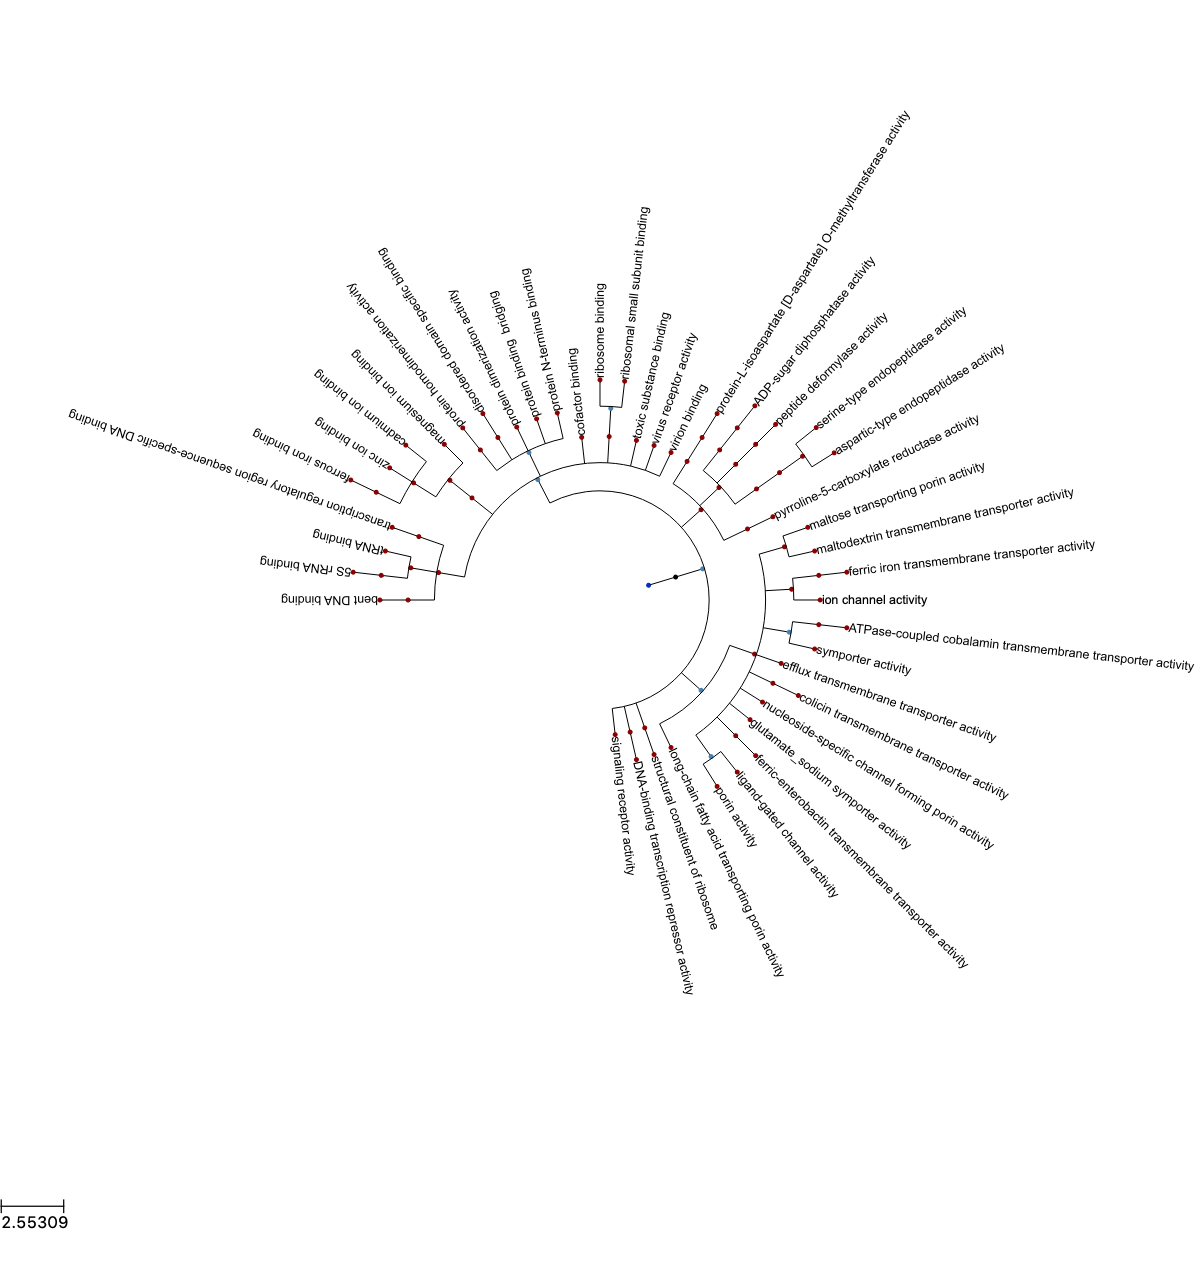

In [335]:
#import PyQt5

#viewTree = xpGoTree.newRoot('protein binding')
viewTree = dTree

from ete3 import Tree, TreeStyle, NodeStyle
t = Tree(viewTree.as_newick(), format=8, quoted_node_names=True)
#t.populate(30)
ts = TreeStyle()
ts.show_leaf_name = True
ts.mode = "c"
ts.arc_start = -180 # 0 degrees = 3 o'clock
ts.arc_span = 270

for n in t.traverse():
    if n.name == "":
        continue
    node = viewTree.getByName(n.name)
    nstyle = NodeStyle()
    
    if not node:
        print("->", n.name) 
    elif node.name == 'root':
        nstyle["fgcolor"] = "black"
    else :
        nstyle["fgcolor"] = "darkred" if len(node.eTag) > 0 else "steelblue"

    n.set_style(nstyle)
    
t.render(file_name="%%inline", w=1200, tree_style=ts)

In [369]:
print(dTree.root.children[0],"\n---------\n")
tt=0
for c in dTree.root.children[0].children:
    print(c)
    tt+=c.leafCount
tt

{'ID': 'GO:0003674', 'name': 'molecular function', 'eTag': [], 'leafCount': 1418, 'features': {'Fisher': 1.0, 'Hpg': 1.0}, 'children': ['binding', 'catalytic activity', 'transporter activity', 'structural molecule activity', 'DNA-binding transcription factor activity', 'signaling receptor activity']} 
---------

{'ID': 'GO:0005488', 'name': 'binding', 'eTag': [], 'leafCount': 1121, 'features': {'Fisher': 0.987432260260342, 'Hpg': 0.9884796850521387}, 'children': ['nucleic acid binding', 'cation binding', 'protein binding', 'cofactor binding', 'protein-containing complex binding', 'toxic substance binding', 'virus receptor activity', 'virion binding']}
{'ID': 'GO:0003824', 'name': 'catalytic activity', 'eTag': ['P68066', 'P33136', 'P0C8J8', 'P37691', 'P40120', 'P0AD12', 'P32157', 'P77775', 'P76004', 'P60720'], 'leafCount': 94, 'features': {'Fisher': 1.0, 'Hpg': 0.9999999999999792}, 'children': ['transferase activity', 'hydrolase activity', 'oxidoreductase activity']}
{'ID': 'GO:0005215'

1418

In [372]:
max([ n.leafCount   for n in viewTree.traverse() ])

1418

In [391]:
l=[ n.leafCount   for n in viewTree.traverse() ]
c_cmap = plt.cm.rainbow
norm = matplotlib.colors.BoundaryNorm([ wMin, np.percentile(l,25), np.percentile(l,50), np.percentile(l,75), wMax ], c_cmap.N)


In [392]:
c_cmap(norm(10))

(0.8333333333333333, 0.8660254037844388, 0.5000000000000001, 1.0)

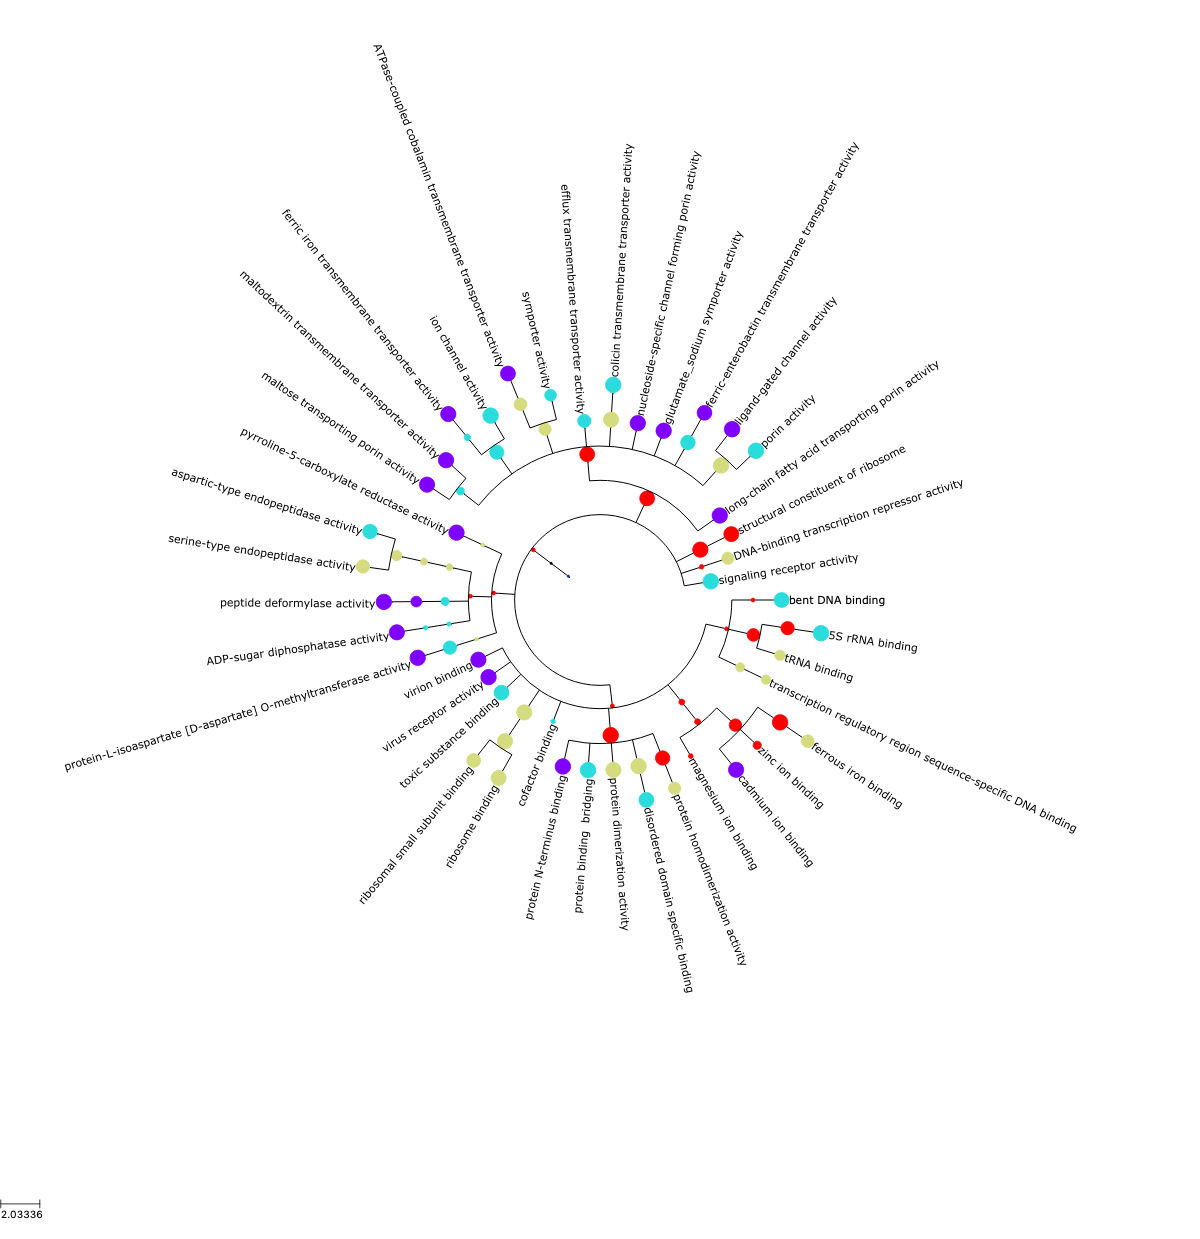

In [394]:
from ete3 import Tree, TreeStyle, NodeStyle, faces, AttrFace, CircleFace

import matplotlib.pyplot as plt
import matplotlib.colors as co

viewTree = dTree

wMin = min([ n.leafCount   for n in viewTree.traverse() ])
wMax = max([ n.leafCount   for n in viewTree.traverse() ])

[ n.leafCount   for n in viewTree.traverse() ]

def categoricalColorScale(value):
    v = c_cmap(norm(value))
    _v = co.ColorConverter.to_rgb(v)
    s = '%02x%02x%02x' % (int(_v[0]*255), int(_v[1]*255), int(_v[2]*255))
    #print(value, s)
    #print(_v)
    return f"#{s}"

def colorScale(value):
    #print (">>", value, wMin, wMax, "<<")
    norm = co.Normalize(vmin=wMin, vmax=wMax)
    cmap = plt.cm.winter
    v = cmap( norm(value) )
    #print(v)
    _v = co.ColorConverter.to_rgb(v)
    
    s = '%02x%02x%02x' % (int(_v[0]*255), int(_v[1]*255), int(_v[2]*255))
    #print(value, s)
    #print(_v)
    return f"#{s}"

def radiusScale(t):
    maxRadius, minRadius = (20, 5)
    return t *(minRadius - maxRadius) + maxRadius

def layout(node):
    if node.is_leaf():
        # Add node name to laef nodes
        N = AttrFace("name", fsize=14, fgcolor="black")
        faces.add_face_to_node(N, node, 0)
    return 
    
    
    if "weight" in node.features:
        # Creates a sphere face whose size is proportional to node's
        # feature "weight"
     #   col = colorScale(node.fisher)
        col = colorScale(node.weight)
        w = (1 - node.fisher) * 10
  #      print (col)
        #  C = CircleFace(radius=node.weight, color=QColor(*col), style="sphere")
#        C = CircleFace(radius=w, color=QColor(*col), style="sphere")
        C = CircleFace(radius=w, color=col, style="sphere")
        
        # Let's make the sphere transparent
        C.opacity = 0.3
        # And place as a float face over the tree
        #faces.add_face_to_node(C, node, 0, position="float")


for n in t.traverse():
    if n.name == "":
        continue
        
    node = viewTree.getByName(n.name)
   
    if not node:
        raise KeyError("Oups")
    if node.name == 'root':
        continue
    
    #print (node)
    
    w = node.leafCount
    #print ("-->", w)
    f = 1.0
    try:
        f = getattr(node, 'Fisher')
    except AttributeError:
        pass
    
    nstyle = NodeStyle()
    
    nstyle["fgcolor"] = categoricalColorScale(w)
    #print(node)
    nstyle["size"] = radiusScale(node.Fisher)

    n.set_style(nstyle)
    
    n.add_features(weight=w, fisher = f)

# Create an empty TreeStyle
ts = TreeStyle()

# Set our custom layout function
ts.layout_fn = layout

# Draw a tree
ts.mode = "c"

# We will add node names manually
ts.show_leaf_name = False
# Show branch data
ts.show_branch_length = False
ts.show_branch_support = False

t.render(file_name="%%inline", w=1200, tree_style=ts)


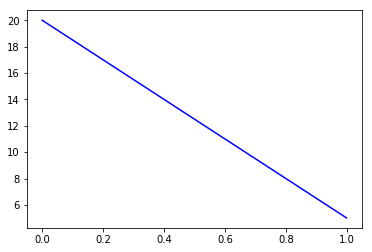

In [270]:
import numpy as np
import matplotlib.pyplot as plt


t1 = np.arange(0.0, 1.0, 0.001)

# max radius for pvalue [ 0.0, 1.0 ] -> [ minRadius, maxRadius ]
def f(t):
    maxRadius, minRadius = (20, 5)
    return t *(minRadius - maxRadius) + maxRadius

plt.plot(t1, f(t1), 'b-')


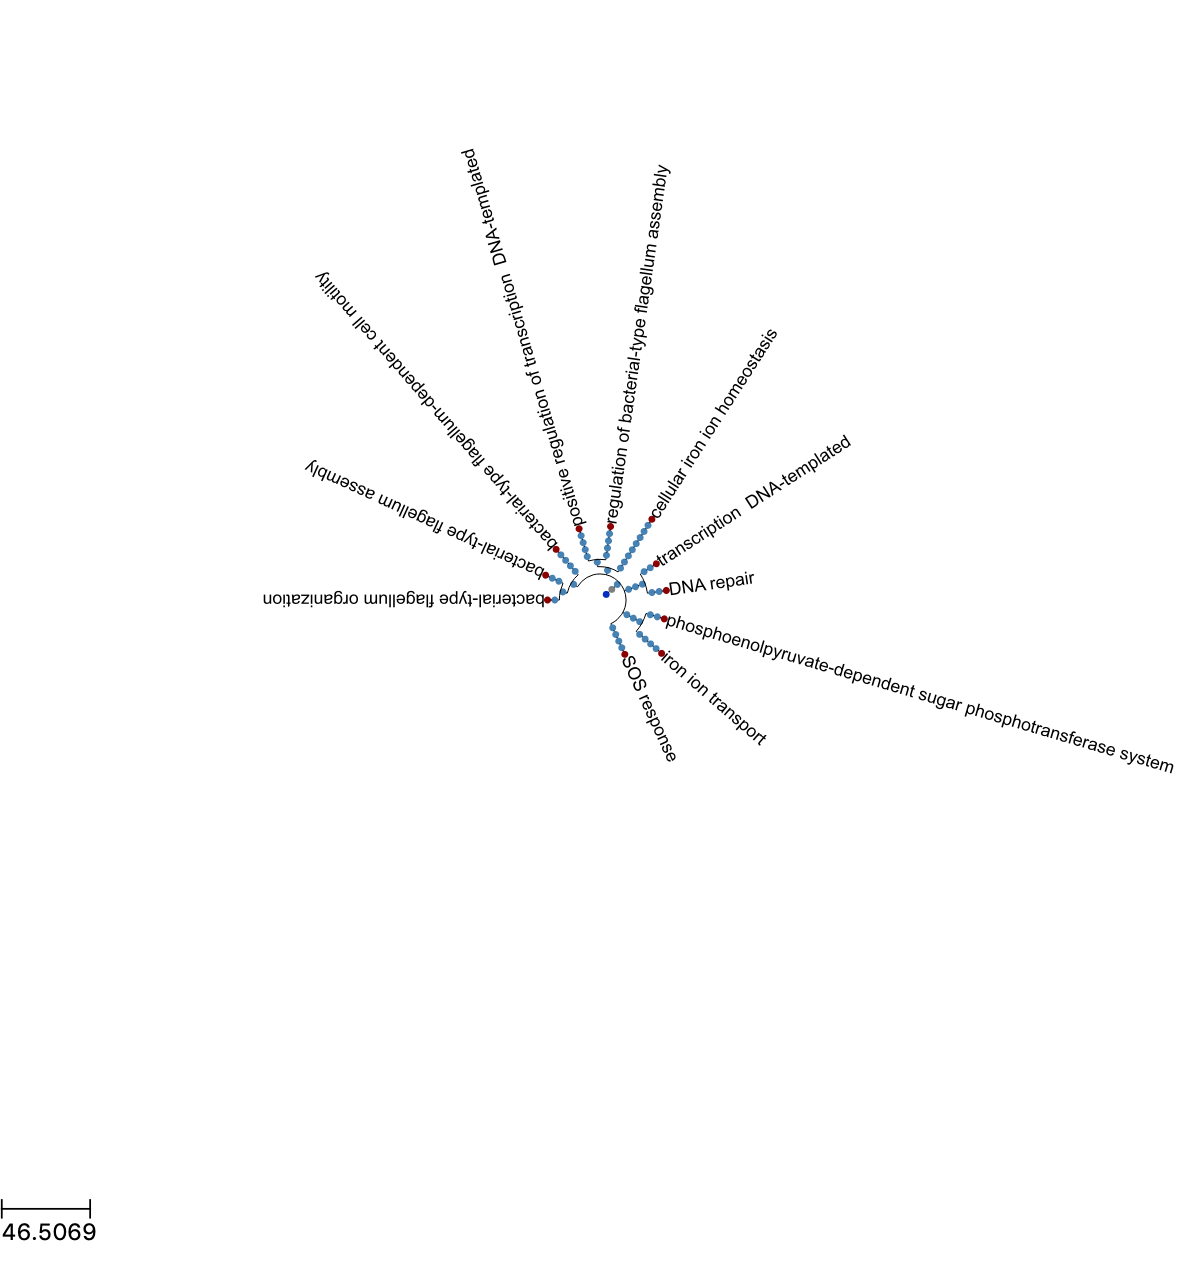

In [92]:
#import PyQt5
from ete3 import Tree, TreeStyle, NodeStyle
t = Tree(nw, format=8)
#t.populate(30)
ts = TreeStyle()
ts.show_leaf_name = True
ts.mode = "c"
ts.arc_start = -180 # 0 degrees = 3 o'clock
ts.arc_span = 270
#t.show(tree_style=ts)



for n in t.traverse():
    node = getByName(tree_BP, n.name)
    nstyle = NodeStyle()
    
    if not node:
        print(n.name) 
    elif node['name'] == 'root':
        nstyle["fgcolor"] = "grey"
    else :
        nstyle["fgcolor"] = "darkred" if node['realCount'] > 0 else "steelblue"

    n.set_style(nstyle)
    
t.render(file_name="%%inline", w=1200, tree_style=ts)

### Evaluation théorique de l'abondance

* $Q+$ : Proteines Sur-représentées
* $\overline{Q+}$ : Proteines non Sur-représentées

* $PW^{a}$ : Nombre de protéines membres du Pathway$a$
* $\overline{PW^{a}}$ : Nombre de protéines non-membres du Pathway$a$



 Proteines | $Q+$  | $\overline{Q+}$ | Total lignes
 :--- | --- |--- |---|
membres de $PW^{a}$  | $PW^{a}_{Q+}$ | $PW^{a}_{\overline{Q+}}$ | $nPW^{a}$
non-membres de $PW_{a}$ | $\overline{PW^{a}}_{Q+}$ | $\overline{PW^{a}}_{\overline{Q+}}$ | $n\overline{PW^{a}}$
  **Total colonnes** | n$Q+$ | n$\overline{Q+}$ | **nTOT**
 
 
**Question**:"Le nombre de protéines sur-représentées dans le Pathway$a$ est-il grand comparé à ce qui serait attendu au hasard?"


<!--## Deprecated 
 **Question**:"Les protéines sur-représentées sont-elles plus fréquentes dans le Pathway$a$ que dans les protéines non-membre du Pathway$X$?"
 
L'hypothèse nulle est "Les protéines membres du pathway et non-membres du pathway ont des quantifications similaires".
 -->
        

### Modélisation du hasard par une loi hypergéométrique

Pour un pathway donné ($PWa$), chaque protéine sur-abondante peut être vue comme un tirage dans le pool de protéines de l'expérience. La population de ce pool est consituée de deux groupes:
 * Le groupe des protéines appartenant à $PWa$
 * Les autres

La probabilité d'observer $k$ protéines de $PWa$ parmi les $n$ sur-abondantes se modélise alors naturellemnent par la loi de probabilité hypergéométrique.

Rappellez-vous,

Si X est la variable aléatoire du nombre de succès parmi n observations, sans remise.
Alors la probabilité d'oberver exactement $k$ succès, suit une loi hypergéométrique de paramètres $N, n$ et $k$

$P(X=k) = \frac{ {K\choose k} {N-K\choose n-k} } { {N\choose K} }$

où


* $K$ est le nombre de succès dans la population totale
* $n$ est le nombre d'observations
* $N$ est la taille de la population totale
* $k$ est le nombre de succès parmi les observations

Si **pour chaque $Pathway^{a}$**, $X$ est la variable aléatoire du **nombre de protéines sur-représentée** dans l'experience.


Cocher les relations correspondantes


  x  | $nTOT$ | $PW^{a}_{Q+}$ | $nPW^{a}$ | $nQ+$
 --- | ---   | ---     | ---  | --- |
 $K$ |       |         |      | 
 $n$ |       |         |      | 
 $N$ |       |         |      | 
 $k$ |       |         |      | 
 
 
 
 
Rappel: $nPW^{a}_{Q+}$ est le nombre de protéines appartenant au $Pathway^{a}$ parmi les protéines surexprimées

Que représentent alors les deux expressions suivantes:

$ P(X=nPW^{a}_{Q+}) \frac{ {nPW^{a}\choose X} {n\overline{PW^{a}}\choose nQ^{+} - X} } { {nTOT\choose nPW^{a}} }$


$P(X >= PW^{a}_{Q+})  = \sum_{x_{i}=PW^{a}_{Q+}}^{x_{i} \le nQ+}\frac{ {nPW^{a}\choose x_{i}} {n\overline{PW^{a}}\choose nQ^{+} - x_{i}} } { {nTOT\choose nPW^{a}} }$


### Evaluation de l'enrichissement en pathway

A l'aide de la fonction [scipy.stats.hypergeom](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.hypergeom.html) implémenter la fonction évaluant la probabilité d'observer au moins k protéines $PW^{a}_{Q+}$ parmi un nombre $n$ de protéines surexprimés ($nQ+$). Vous utiliserez le dictionaire GO pour l'évaluation du paramètre $nPW^{a}$. 

```python

def hRight(k, n, Godict): p

```

### Application à une condition experimentale

A l'aide de la fonction hRight, créé la fonction ```pathwayAnalysis``` qui prend un tableau de conditions experimentales et retourne une liste de pathway ordonnés par hRight croissante.

```python
    def pathwayAnalysis(foldChangeList, GOdict):pathwayRank
```


La liste ```pathwayRank``` retournée sera de la forme suivante

```python
[ { GO_TERM : { 'hRight': hRight, 'Qplus' : [UNIPROT_ID, ...] } }, ... ]
```



#### Structure d'annotation fonctionelle

Règle du vrai chemin
Si une protéine possède terme GO,alors est elle possède aussi tous les parents de ce terme.

A l'aide du module ```ontology.py```, 

Construire un dictionnaire des termes GO portés par les protéines de l'experience. Il devra avoir la forme:


```python
{
    GO_TERM : [UNIPROT_ID, ...],
 ...
}

```



#### Visualisation des abondances et Pathway pour chaque protéine

###### Volcano Plot global

######  Volcano Plot interactif



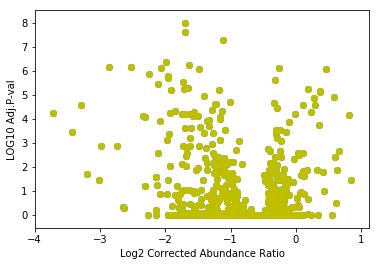

In [41]:
%matplotlib inline

x = [ float(i) for i in dfClean['Log2 Corrected Abundance Ratio'].tolist() ]
y = [ float(i) for i in dfClean['LOG10 Adj.P-val'].tolist() ]

def drawScatter(x, y):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    plt.yticks(np.arange(min(y), max(y)+1, 1.0))
    plt.scatter(x, y)
    scat = ax.scatter(x, y, color='y')
    plt.ylabel('LOG10 Adj.P-val')
    plt.xlabel('Log2 Corrected Abundance Ratio')
    plt.show()
    
    
drawScatter(x,y)

Dropdown(description='Clicks select:', options=('PathwayX', 'PathwayY', 'Pathway Z'), value='PathwayX')

<IPython.core.display.Javascript object>


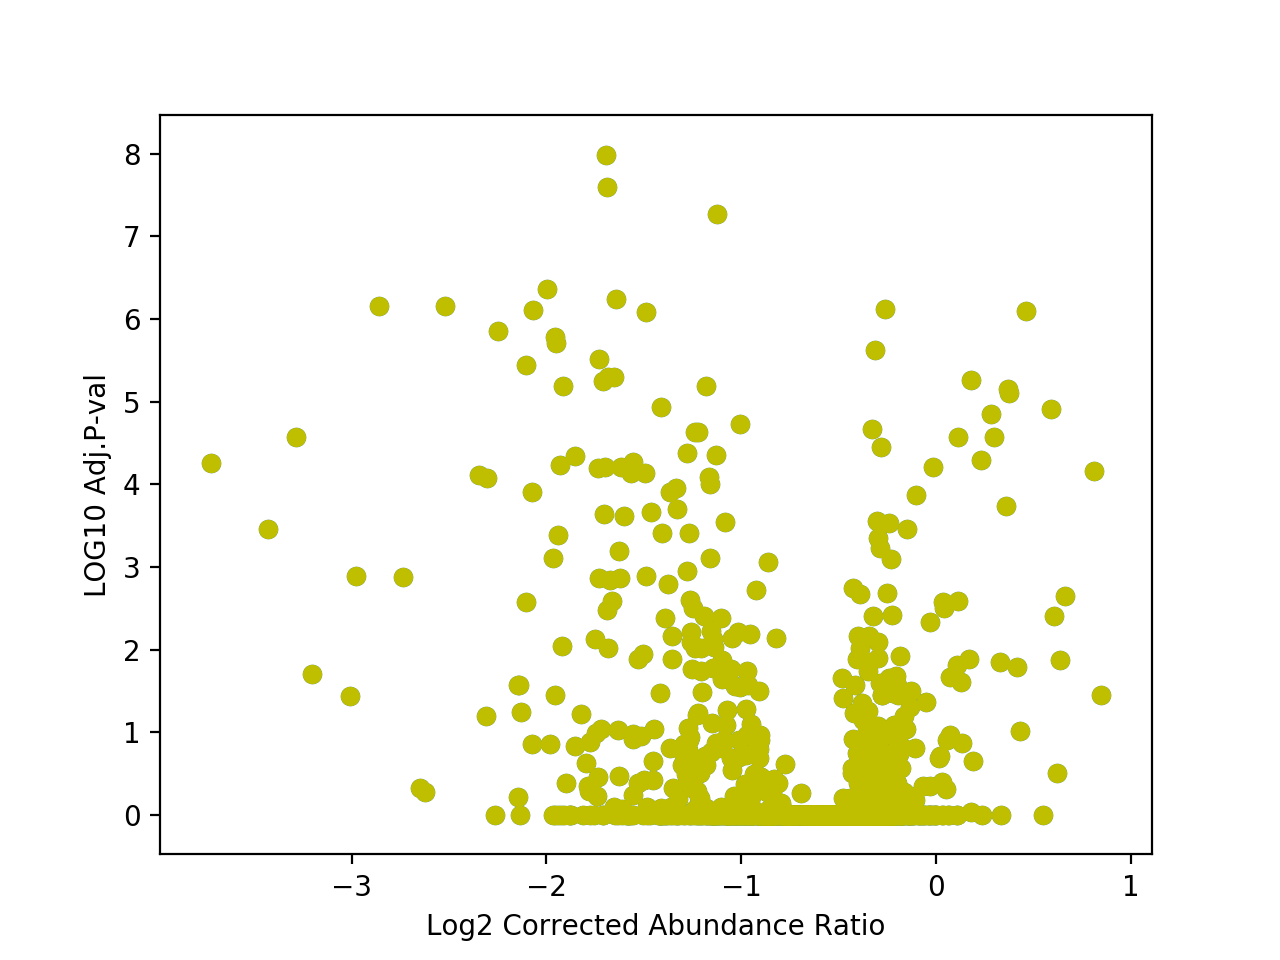

In [42]:
#https://stackoverflow.com/questions/9401658/how-to-animate-a-scatter-plot

%matplotlib notebook
import ipywidgets as widgets
import numpy as np
import matplotlib.pyplot as plt

# Define the content of the Dropdown list
selWidget = widgets.Dropdown(description='Clicks select:', 
                             value= 'PathwayX', options=('PathwayX', 'PathwayY', 'Pathway Z') 
                            )
# Define the behaviour on list change     
def on_value_change(change):
    print(change["new"])
    scat.set_array( np.random.random(len(x)) )
    fig.canvas.draw_idle()

# Bind the change function to the list widget, display the widget    
selWidget.observe(on_value_change, names='value')
display(selWidget)

# Draw the figure in its initial state

x = [ float(i) for i in dfClean['Log2 Corrected Abundance Ratio'].tolist() ]
y = [ float(i) for i in dfClean['LOG10 Adj.P-val'].tolist() ]

drawScatter(x, y)
